In [202]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Open train and test Data

In [203]:
house_train = pd.read_csv('train.csv', usecols = ['LotFrontage','LotArea','Neighborhood','OverallQual','OverallCond',
                                                  'ExterQual','ExterCond','TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFullBath',
                                                  'FullBath','GarageArea','SalePrice'])
house_train

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,GarageArea,SalePrice
0,65.0,8450,CollgCr,7,5,Gd,TA,856,856,854,1,2,548,208500
1,80.0,9600,Veenker,6,8,TA,TA,1262,1262,0,0,2,460,181500
2,68.0,11250,CollgCr,7,5,Gd,TA,920,920,866,1,2,608,223500
3,60.0,9550,Crawfor,7,5,TA,TA,756,961,756,1,1,642,140000
4,84.0,14260,NoRidge,8,5,Gd,TA,1145,1145,1053,1,2,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,Gilbert,6,5,TA,TA,953,953,694,0,2,460,175000
1456,85.0,13175,NWAmes,6,6,TA,TA,1542,2073,0,1,2,500,210000
1457,66.0,9042,Crawfor,7,9,Ex,Gd,1152,1188,1152,0,2,252,266500
1458,68.0,9717,NAmes,5,6,TA,TA,1078,1078,0,1,1,240,142125


In [204]:
house_test = pd.read_csv('test.csv', usecols = ['LotFrontage','LotArea','Neighborhood','OverallQual','OverallCond',
                                                  'ExterQual','ExterCond','TotalBsmtSF','1stFlrSF','2ndFlrSF','BsmtFullBath',
                                                  'FullBath','GarageArea',])
house_test

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,GarageArea
0,80.0,11622,NAmes,5,6,TA,TA,882.0,896,0,0.0,1,730.0
1,81.0,14267,NAmes,6,6,TA,TA,1329.0,1329,0,0.0,1,312.0
2,74.0,13830,Gilbert,5,5,TA,TA,928.0,928,701,0.0,2,482.0
3,78.0,9978,Gilbert,6,6,TA,TA,926.0,926,678,0.0,2,470.0
4,43.0,5005,StoneBr,8,5,Gd,TA,1280.0,1280,0,0.0,2,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,MeadowV,4,7,TA,TA,546.0,546,546,0.0,1,0.0
1455,21.0,1894,MeadowV,4,5,TA,TA,546.0,546,546,0.0,1,286.0
1456,160.0,20000,Mitchel,5,7,TA,TA,1224.0,1224,0,1.0,1,576.0
1457,62.0,10441,Mitchel,5,5,TA,TA,912.0,970,0,0.0,1,0.0


In [205]:
house_test.fillna(0,inplace=True)

In [206]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1459 non-null   float64
 1   LotArea       1459 non-null   int64  
 2   Neighborhood  1459 non-null   object 
 3   OverallQual   1459 non-null   int64  
 4   OverallCond   1459 non-null   int64  
 5   ExterQual     1459 non-null   object 
 6   ExterCond     1459 non-null   object 
 7   TotalBsmtSF   1459 non-null   float64
 8   1stFlrSF      1459 non-null   int64  
 9   2ndFlrSF      1459 non-null   int64  
 10  BsmtFullBath  1459 non-null   float64
 11  FullBath      1459 non-null   int64  
 12  GarageArea    1459 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage: 148.3+ KB


# Clean data

In [207]:
house_train = house_train.dropna(how='any',axis=0)
house_train

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,GarageArea,SalePrice
0,65.0,8450,CollgCr,7,5,Gd,TA,856,856,854,1,2,548,208500
1,80.0,9600,Veenker,6,8,TA,TA,1262,1262,0,0,2,460,181500
2,68.0,11250,CollgCr,7,5,Gd,TA,920,920,866,1,2,608,223500
3,60.0,9550,Crawfor,7,5,TA,TA,756,961,756,1,1,642,140000
4,84.0,14260,NoRidge,8,5,Gd,TA,1145,1145,1053,1,2,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,Gilbert,6,5,TA,TA,953,953,694,0,2,460,175000
1456,85.0,13175,NWAmes,6,6,TA,TA,1542,2073,0,1,2,500,210000
1457,66.0,9042,Crawfor,7,9,Ex,Gd,1152,1188,1152,0,2,252,266500
1458,68.0,9717,NAmes,5,6,TA,TA,1078,1078,0,1,1,240,142125


In [208]:
house_test = house_test.dropna(how='any',axis=0)
house_test

,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,GarageArea
0,80.0,11622,NAmes,5,6,TA,TA,882.0,896,0,0.0,1,730.0
1,81.0,14267,NAmes,6,6,TA,TA,1329.0,1329,0,0.0,1,312.0
2,74.0,13830,Gilbert,5,5,TA,TA,928.0,928,701,0.0,2,482.0
3,78.0,9978,Gilbert,6,6,TA,TA,926.0,926,678,0.0,2,470.0
4,43.0,5005,StoneBr,8,5,Gd,TA,1280.0,1280,0,0.0,2,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,MeadowV,4,7,TA,TA,546.0,546,546,0.0,1,0.0
1455,21.0,1894,MeadowV,4,5,TA,TA,546.0,546,546,0.0,1,286.0
1456,160.0,20000,Mitchel,5,7,TA,TA,1224.0,1224,0,1.0,1,576.0
1457,62.0,10441,Mitchel,5,5,TA,TA,912.0,970,0,0.0,1,0.0


# Get Dummies

In [209]:
house_train = pd.get_dummies(house_train,drop_first=True)
house_train

,LotFrontage,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,GarageArea,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,65.0,8450,7,5,856,856,854,1,2,548,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,6,8,1262,1262,0,0,2,460,...,0,0,1,0,0,1,0,0,0,1
2,68.0,11250,7,5,920,920,866,1,2,608,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,7,5,756,961,756,1,1,642,...,0,0,0,0,0,1,0,0,0,1
4,84.0,14260,8,5,1145,1145,1053,1,2,836,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,953,953,694,0,2,460,...,0,0,0,0,0,1,0,0,0,1
1456,85.0,13175,6,6,1542,2073,0,1,2,500,...,0,0,0,0,0,1,0,0,0,1
1457,66.0,9042,7,9,1152,1188,1152,0,2,252,...,0,0,0,0,0,0,0,1,0,0
1458,68.0,9717,5,6,1078,1078,0,1,1,240,...,0,0,0,0,0,1,0,0,0,1


In [210]:
house_test = pd.get_dummies(house_test,drop_first=True)
house_test

,LotFrontage,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,GarageArea,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,80.0,11622,5,6,882.0,896,0,0.0,1,730.0,...,0,0,0,0,0,1,0,0,0,1
1,81.0,14267,6,6,1329.0,1329,0,0.0,1,312.0,...,0,0,0,0,0,1,0,0,0,1
2,74.0,13830,5,5,928.0,928,701,0.0,2,482.0,...,0,0,0,0,0,1,0,0,0,1
3,78.0,9978,6,6,926.0,926,678,0.0,2,470.0,...,0,0,0,0,0,1,0,0,0,1
4,43.0,5005,8,5,1280.0,1280,0,0.0,2,506.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,546.0,546,546,0.0,1,0.0,...,0,0,0,0,0,1,0,0,0,1
1455,21.0,1894,4,5,546.0,546,546,0.0,1,286.0,...,0,0,0,0,0,1,0,0,0,1
1456,160.0,20000,5,7,1224.0,1224,0,1.0,1,576.0,...,0,0,0,0,0,1,0,0,0,1
1457,62.0,10441,5,5,912.0,970,0,0.0,1,0.0,...,0,0,0,0,0,1,0,0,0,1


# Machine Learning - Separate columns X,Y and training by using LinearRegression and RandomForestRegressor 

In [211]:
from sklearn.model_selection import train_test_split

y = house_train["SalePrice"]
x = house_train.drop("SalePrice", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_train,y_train)
modelo_arvoredecisao.fit(x_train,y_train)

RandomForestRegressor()

# IA test and best model avaliation 
Using R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [213]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_test)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_test)

from sklearn.metrics import r2_score

print(r2_score(y_test, previsao_regressaolinear))
print(r2_score(y_test, previsao_arvoredecisao))

0.8331646559756678
0.8138709340129998


# Visualização Gráfica das Previsões

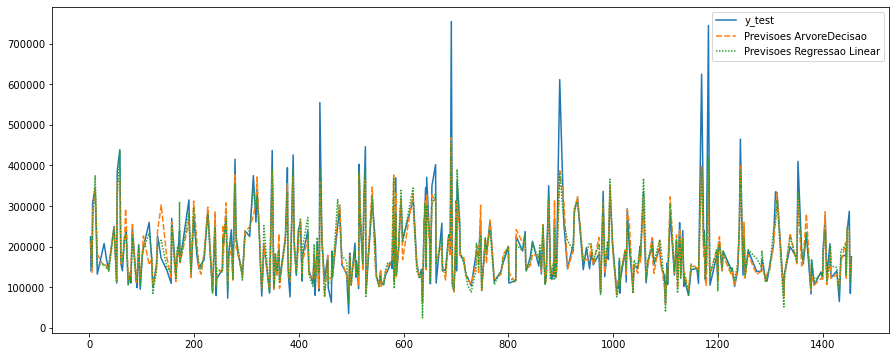

In [214]:
tabela_auxiliar = pd.DataFrame() #cria um novo data frame
tabela_auxiliar["y_test"] = y_test
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))#aumenta o tamanho do grafico
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [215]:
tabela_auxiliar

,y_test,Previsoes ArvoreDecisao,Previsoes Regressao Linear
292,131000,123988.84,117312.757721
1238,142500,156433.75,159171.665948
280,228500,198046.60,216165.104786
82,245000,258332.91,228294.697732
440,555000,357907.20,393365.086545
...,...,...,...
431,79900,121377.96,110055.722602
1274,139000,131299.62,170354.533003
661,402000,311063.97,332177.223360
306,225000,248981.77,240472.621750


# Test the house_test dataset by using RandomForestRegressor

In [216]:
house_test

,LotFrontage,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,GarageArea,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA
0,80.0,11622,5,6,882.0,896,0,0.0,1,730.0,...,0,0,0,0,0,1,0,0,0,1
1,81.0,14267,6,6,1329.0,1329,0,0.0,1,312.0,...,0,0,0,0,0,1,0,0,0,1
2,74.0,13830,5,5,928.0,928,701,0.0,2,482.0,...,0,0,0,0,0,1,0,0,0,1
3,78.0,9978,6,6,926.0,926,678,0.0,2,470.0,...,0,0,0,0,0,1,0,0,0,1
4,43.0,5005,8,5,1280.0,1280,0,0.0,2,506.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,546.0,546,546,0.0,1,0.0,...,0,0,0,0,0,1,0,0,0,1
1455,21.0,1894,4,5,546.0,546,546,0.0,1,286.0,...,0,0,0,0,0,1,0,0,0,1
1456,160.0,20000,5,7,1224.0,1224,0,1.0,1,576.0,...,0,0,0,0,0,1,0,0,0,1
1457,62.0,10441,5,5,912.0,970,0,0.0,1,0.0,...,0,0,0,0,0,1,0,0,0,1


In [224]:
previsao = modelo_regressaolinear.predict(house_test)

In [225]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [226]:
verification = pd.DataFrame()
verification['Id']= sample_sub['Id']
verification['SalesPriceSample'] = sample_sub['SalePrice']
verification['SalesPricePredict']= previsao
verification

,Id,SalesPriceSample,SalesPricePredict
0,1461,169277.052498,132374.330084
1,1462,187758.393989,145651.725949
2,1463,183583.683570,167543.656665
3,1464,179317.477511,182942.344735
4,1465,150730.079977,288355.483286
...,...,...,...
1454,2915,167081.220949,80080.997667
1455,2916,164788.778231,81753.553635
1456,2917,219222.423400,166749.967505
1457,2918,184924.279659,101325.832091


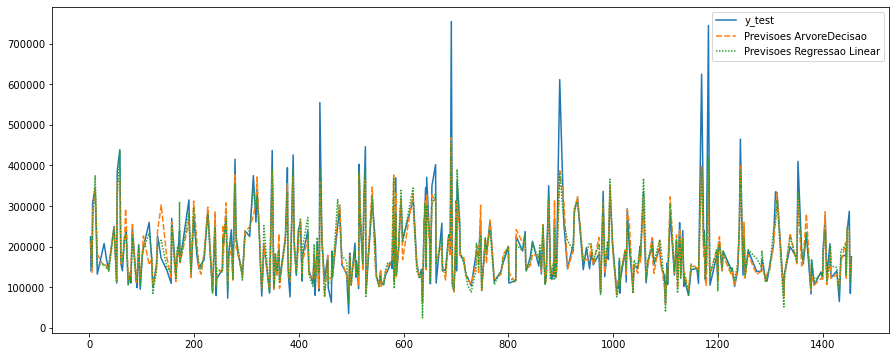

In [227]:
plt.figure(figsize=(15,6))#aumenta o tamanho do grafico
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [228]:
submission = pd.DataFrame(verification,columns=['Id','SalesPricePredict'])
submission

,Id,SalesPricePredict
0,1461,132374.330084
1,1462,145651.725949
2,1463,167543.656665
3,1464,182942.344735
4,1465,288355.483286
...,...,...
1454,2915,80080.997667
1455,2916,81753.553635
1456,2917,166749.967505
1457,2918,101325.832091


In [229]:
submission = submission.rename(columns={'SalesPricePredict':'SalePrice'})

In [230]:
submission.to_csv("submission.csv",index=False)